#SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.

In [1]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [2]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# set size of inline plots
matplotlib.rcParams['figure.figsize'] = [14, 10]

Some global data

In [4]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 100000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(1970 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [5]:
sma_period = 200
percent_band = 3.5

Run Strategy

In [6]:
s = strategy.Strategy(symbol, capital, start, end, sma_period, percent_band)
s.run()

Retrieve log DataFrames

In [7]:
s.tlog, s.dbal = s.get_logs()
s.stats = s.stats()

In [8]:
s.tlog.tail(100)

,entry_date,entry_price,long_short,qty,exit_date,exit_price,pl_points,pl_cash,cumul_total
0,1950-10-18,20.01,long,4997,1953-04-23 00:00:00,24.19,4.18,20887.46,20887.46
1,1954-01-15,25.43,long,4753,1956-10-01 00:00:00,44.70,19.27,91590.31,112477.77
2,1957-05-31,47.43,long,4479,1957-08-26 00:00:00,43.89,-3.54,-15855.66,96622.11
3,1958-05-06,44.01,long,4467,1960-01-29 00:00:00,55.61,11.60,51817.21,148439.32
4,1960-12-28,57.78,long,4299,1962-04-27 00:00:00,66.30,8.52,36627.50,185066.82
5,1962-12-20,62.82,long,4537,1965-06-25 00:00:00,83.06,20.24,91828.87,276895.69
6,1965-09-15,89.52,long,4210,1966-05-09 00:00:00,86.32,-3.20,-13471.99,263423.70
7,1967-01-20,86.07,long,4222,1968-02-09 00:00:00,89.86,3.79,16001.38,279425.09
8,1968-04-18,97.08,long,3908,1969-06-12 00:00:00,98.26,1.18,4611.44,284036.53
9,1970-10-05,86.47,long,4441,1971-10-22 00:00:00,95.57,9.10,40413.09,324449.62


In [9]:
s.dbal.tail()

,high,low,close,shares,cash,state
date,,,,,,
2019-05-09,13687586.48,13499272.52,13662601.73,4759,845.39,1
2019-05-10,13760589.96,13446875.89,13713427.52,4759,845.39,1
2019-05-13,13517309.32,13332850.43,13382535.28,4759,845.39,1
2019-05-14,13576083.43,13421797.03,13489802.16,4759,845.39,1
2019-05-15,13605303.18,13397811.48,13568563.84,4759,845.39,2


Generate strategy stats - display all available stats

In [10]:
pf.print_full(s.stats)

start                                                   1950-10-18
end                                                     2019-05-15
beginning_balance                                           100000
ending_balance                                         13568563.84
total_net_profit                                       13468563.84
gross_profit                                           13643635.46
gross_loss                                              -175071.61
profit_factor                                                77.93
return_on_initial_capital                                 13468.56
annual_return_rate                                            7.42
trading_period                           68 years 6 months 27 days
pct_time_in_market                                           70.84
total_num_trades                                                30
num_winning_trades                                              24
num_losing_trades                                             

Equity curve

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [11]:
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1950-10-18 00:00:00 BUY  4997 ^GSPC @ 20.01
2019-05-15 00:00:00 SELL 4997 ^GSPC @ 2850.96


Plot Equity Curves: Strategy vs Benchmark

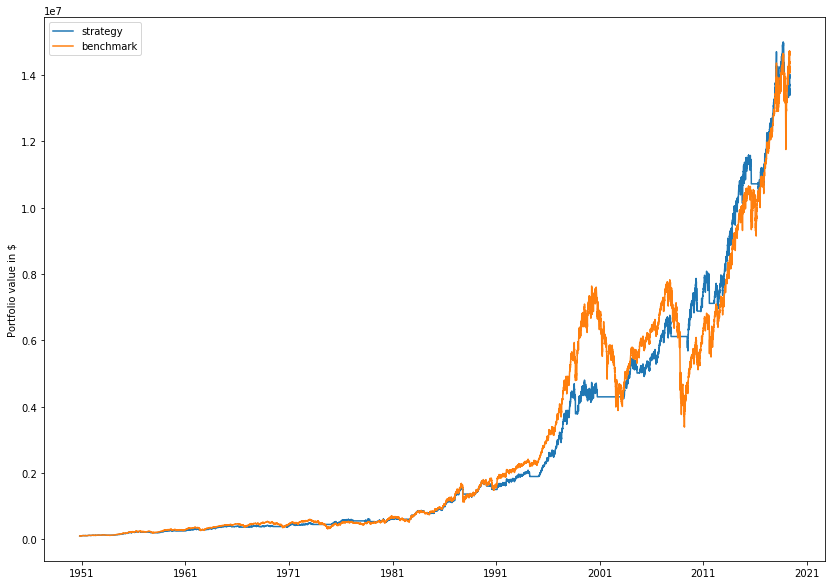

In [12]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

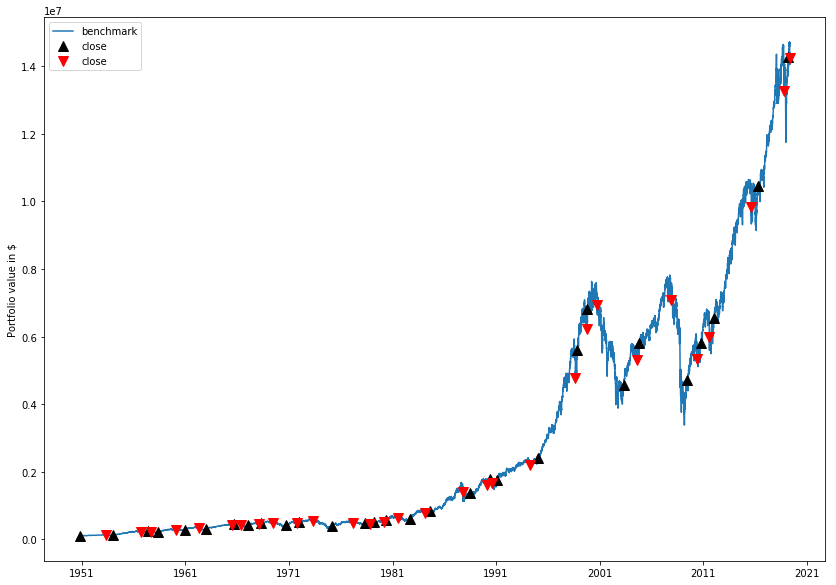

In [13]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,7.42,7.50
max_closed_out_drawdown,-21.35,-56.78
drawdown_annualized_return,-2.88,-7.57
drawdown_recovery,-0.99,-1.42
best_month,14.94,23.49
worst_month,-13.95,-29.56
sharpe_ratio,0.74,0.55
sortino_ratio,0.84,0.71
monthly_std,2.95,4.14


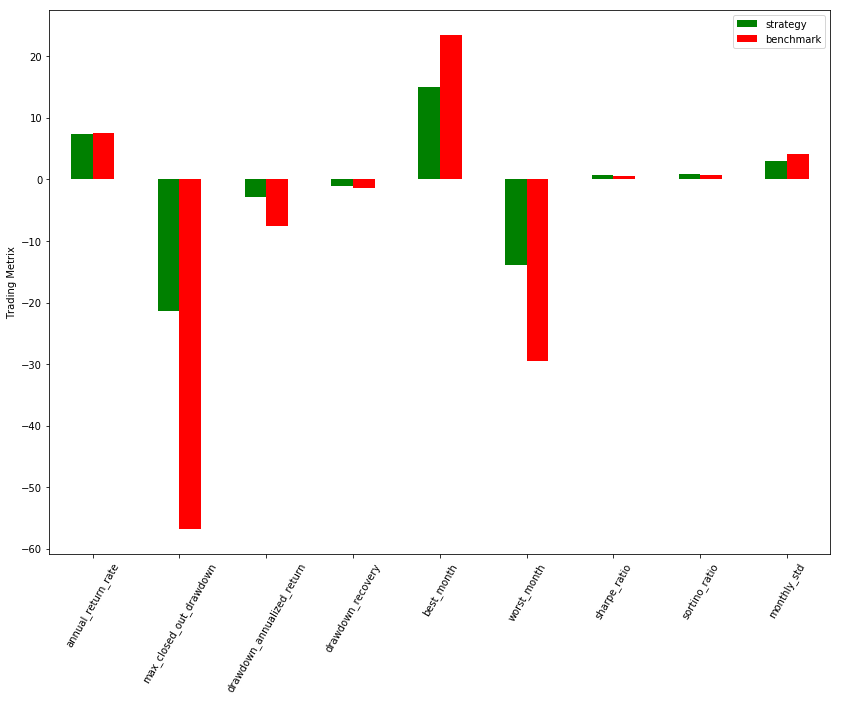

In [14]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std')

df = pf.plot_bar_graph(s.stats, benchmark.stats, *metrics)
df